Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
user_data = pd.read_csv(r'user_data.csv')

In [3]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
logs = pd.read_csv(r'logs.csv')

In [5]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [6]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

12, 123, 456



In [7]:
logs_1 = logs.query("success == True").groupby('client', as_index = False).agg({'success': 'count'})

In [8]:
logs_1

,client,success
0,40,1
1,50,1
2,75,1
3,81,1
4,132,1
...,...,...
2840,99926,1
2841,99927,1
2842,99931,1
2843,99973,1


In [9]:
logs_2 = logs_1.query('success == 41')

In [10]:
logs_2

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


In [11]:
logs_2.sort_values('client')

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


С какой платформы осуществляется наибольшее количество успешных операций?

In [12]:
logs.query('success == True').groupby('platform', as_index = False).agg({'client': 'count'})

,platform,client
0,computer,1090
1,phone,2019
2,tablet,180


Какая платформа наиболее популярна среди премиумных клиентов?

In [13]:
summ = user_data.merge(logs, on = 'client')

In [14]:
summ

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [15]:
summ.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


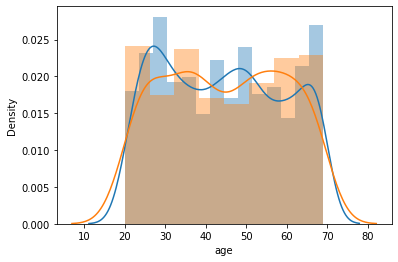

In [16]:
sns.distplot(summ.query('premium == False').age)
sns.distplot(summ.query('premium == True').age)

Постройте график распределения числа успешных операций: 

    x – число успешных операций
    y – число клиентов, совершивших столько успешных операций

In [17]:
summ_1 = summ.query('success == True')

In [18]:
summ_1

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
5,78605,False,36,True,tablet,1585430330
8,77451,False,49,True,phone,1585444298
...,...,...,...,...,...,...
3432,53774,True,50,True,phone,1585422804
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


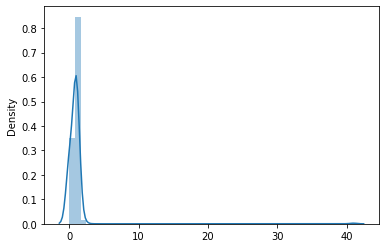

In [19]:
x = summ.groupby('client').agg({'success': 'sum'})
sns.distplot(x)

In [20]:
summ

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Полезные ссылки:

    sns.countplot – документация к типу графика
    figsize – про размер графиков

Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [21]:
fin = summ.query('platform == "computer"').groupby('age', as_index = False).agg({'success': 'sum'})

In [22]:
fin

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26
5,25,33
6,26,14
7,27,14
8,28,49
9,29,17


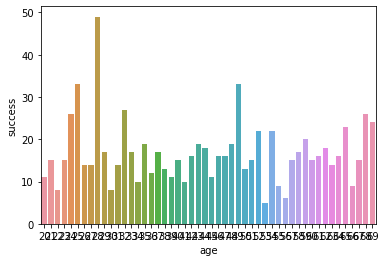

In [23]:
sns.barplot(x = fin.age, y = fin.success)

In [24]:
fin_1 = summ.query('platform == "computer" and success ==True')

In [25]:
fin_1

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


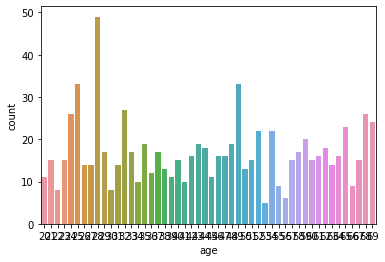

In [26]:
sns.countplot(fin_1.age)